In [77]:
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())

# 1. 라이브러리 선언

In [45]:
import keras

In [46]:
import os
import cv2
import keras
# 케라스 모델 생성 라이브러리
from keras import models
# 레이어 생성 라이브러리 (Dense: 입출력 연결)
from keras import layers
# 케라스 샘플데이터[mnist] 라이브러리 불러오기
from keras.datasets import mnist
# numpy 라이브러리
import numpy as np
from numpy import array
# 케라스 카테고리 라이브러리
from keras.utils import to_categorical
#from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import OneHotEncoder
# 시각화 라이브러리
import matplotlib.pyplot as plt
%matplotlib inline

# 2. 데이터 불러오기

In [47]:
import cv2
import os
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
%matplotlib inline

### 1. 훈련데이터 

In [48]:
# 훈련데이터 디렉토리를 list로 읽어서 array로 변환하기
TRAIN_DIR = '../images/mnist/trainingSet/'
train_folder_list = array(os.listdir(TRAIN_DIR))
train_folder_list

array(['0_zero', '1_one', '2_two', '3_three', '4_four', '5_five', '6_six',
       '7_seven', '8_eight', '9_nine'], dtype='<U7')

In [49]:
# 이미지사이즈를 28로 고정
IMG_SIZE = 28
train_images=[]
train_labels=[]

In [50]:
# 1. 디렉토리를 돌면서 각 디렉토리별 이미지를 gray scale로 읽어서
# 2. 사이즈를 28로 변경하고 train feature 와 label에 append 한다
file_count = 0
for index in range(len(train_folder_list)):
    path = os.path.join(TRAIN_DIR, train_folder_list[index])
    path = path + '/'
    img_list = os.listdir(path)
    for img in img_list:
        img_path = os.path.join(path, img)
        try:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            new_img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            train_images.append(new_img)
            train_labels.append(index)
            file_count += 1
        except Exception as e:
            print("filename:", img_path)
            print(e)
            pass
print(file_count)

filename: ../images/mnist/trainingSet/0_zero/img_0.txt
OpenCV(4.1.1) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

42000


### 2. 테스트 데이터 

In [51]:
# 검증데이터 디렉토리를 list로 읽어서 array로 변환하기
TEST_DIR = '../images/mnist/testSet/'
test_folder_list = array(os.listdir(TEST_DIR))
test_folder_list

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1')

In [52]:
test_images=[]
test_labels=[]
file_count = 0

# 1. 디렉토리를 돌면서 각 디렉토리별 이미지를 gray scale로 읽어서
# 2. 사이즈를 28로 변경하고 test feature 와 label에 append 한다

for index in range(len(test_folder_list)):
    path = os.path.join(TEST_DIR, test_folder_list[index])
    path = path + '/'
    img_list = os.listdir(path)
    for img in img_list:
        img_path = os.path.join(path, img)
        try :
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            new_img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            test_images.append(new_img)
            test_labels.append(index)
            file_count += 1
        except Exception as e:
            print("filename:", img_path)
            print(e)
            pass
print(file_count)

200


### 3. 데이터셋 확인

In [53]:
type(train_images)

list

In [54]:
# 각 데이터 셋을 list -> array로 변경해준다
train_images = array(train_images)
train_labels = array(train_labels)
test_images = array(test_images)
test_labels = array(test_labels)
type(train_images)

numpy.ndarray

In [55]:
print('Training data shape : ', train_images.shape, train_labels.shape)
print('Testing data shape : ', test_images.shape, test_labels.shape)

Training data shape :  (42000, 28, 28) (42000,)
Testing data shape :  (200, 28, 28) (200,)


In [57]:
# 훈련데이터의 전체 분류 확인
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [58]:
 
# 훈련데이터의 답지분류 범위 정의
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
 

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'label : 2')

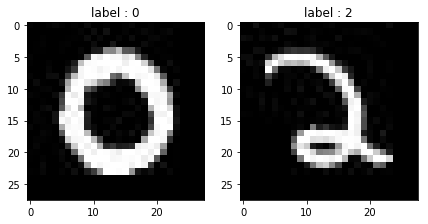

In [59]:
# 훈련/데이터 데이터 시각화
plt.figure(figsize=[7,5])
plt.subplot(121)
plt.imshow(train_images[0], cmap='gray')
plt.title("label : {}".format(train_labels[0]))
plt.subplot(122)
plt.imshow(test_images[42], cmap='gray')
plt.title("label : {}".format(test_labels[42]))

### 3-1. 이미지(28*28) 매트릭스 변환 (w,h,d)

In [61]:
train_images.shape

(42000, 28, 28)

In [62]:
# reshape(갯수, x축, y축, 차원 ) -> gray scale일 경우 차원은 생략 , 어짜피 1개니까
train_data = train_images.reshape(len(train_images), IMG_SIZE,IMG_SIZE)
test_data = test_images.reshape(len(test_images), IMG_SIZE,IMG_SIZE)

In [63]:
train_images.shape

(42000, 28, 28)

In [64]:
train_data.shape

(42000, 28, 28)

In [66]:
train_images[0][1]

array([ 0,  0,  0,  0,  0,  0,  0,  1,  5,  0, 12,  0, 16,  0,  0,  4,  0,
        2,  8,  3,  0,  4,  8,  0,  0,  0,  0,  0], dtype=uint8)

### 3-2. float 타입변환 및 정규화

In [68]:
train_data = train_data.astype('float')
test_data = test_data.astype('float')

train_data /= 255
test_data /= 255

train_data[0][1]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.53787005e-05,
       7.68935025e-05, 0.00000000e+00, 1.84544406e-04, 0.00000000e+00,
       2.46059208e-04, 0.00000000e+00, 0.00000000e+00, 6.15148020e-05,
       0.00000000e+00, 3.07574010e-05, 1.23029604e-04, 4.61361015e-05,
       0.00000000e+00, 6.15148020e-05, 1.23029604e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

### 3-3. 답지 분류형으로 변환

In [69]:
from keras.utils import to_categorical

In [70]:
# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
 
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[10000])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[10000])

Original label 0 :  2
After conversion to categorical ( one-hot ) :  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [71]:
train_labels_one_hot[41999]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [72]:
test_labels_one_hot.shape

(200, 10)

In [73]:
from numpy import argmax

In [74]:
argmax(train_labels_one_hot[10000])

2

In [75]:
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[2])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[2])

Original label 0 :  0
After conversion to categorical ( one-hot ) :  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# 4. 케라스 모델 정의

In [76]:
# 입력데이터 형태
modelDim = train_data[0].shape
modelDim

(28, 28)

In [77]:
import keras
from keras import Sequential
from keras.layers import Flatten, Dense

In [78]:
# 입력데이터 형태
train_data[0].shape

(28, 28)

In [143]:
# 입력데이터 형태
modelDim = train_data[0].shape

# 층 누적 기본형태
model = Sequential()

# 신경망의 첫 번째 레이어에서 입력 데이터 크기를 정의해야 합니다.
model.add(Flatten(input_shape=modelDim))

# 8개의 뉴런 레이어를 추가한다
model.add(Dense(8, activation='relu'))

# 소프트 맥스를 통해서 activation한다
model.add(Dense(nClasses, activation='softmax'))

# model.summary()를 통해 모델을 살펴보세요.
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 6280      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                90        
Total params: 6,370
Trainable params: 6,370
Non-trainable params: 0
_________________________________________________________________


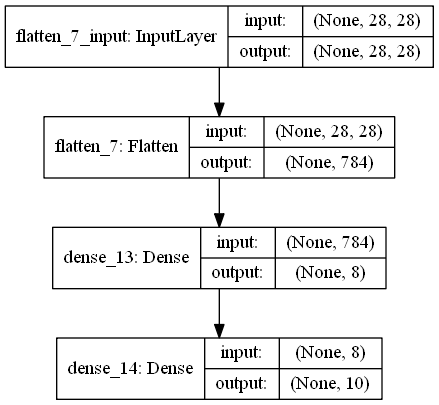

In [144]:
# 모델 시각화
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', 
           show_shapes=True, 
           show_layer_names=True)
from IPython.display import Image
Image(retina=True, filename='model_plot.png')

# 5. 케라스모델 훈련방법 설정

In [145]:
# Sequatial 방싱 케라스모델
# 손실함수(LOSS): 훈련동안 최소화될 값 지표 (mse, categorical_crossentropy)
# 손실함수를 기반으로 Neural Net 업데이터 결정 (mse, mae, accuracy)

# loss 는 카테고리 일경우는 categorical_crossentropy , 숫자 예상 (금액등...) 일경우 mse
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# 6. 모델 훈련

In [146]:
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())

In [147]:
import timeit
start = timeit.default_timer()

# 실행 코드

stop = timeit.default_timer()
print("총 소요시간: ", stop - start)

총 소요시간:  1.649999921937706e-05


In [149]:
from datetime import datetime
now = datetime.now()
date = now.strftime("%Y-%m-%d_%H%M")
save_dir = "./logs_{}".format(date)

callbacks = [
    
    # 텐서보드 활용
    keras.callbacks.TensorBoard(
    log_dir = save_dir,
    write_graph=True,
    write_images=True)
    ,  
    # 과적합 피하기 (계속해서 학습시키면 나중에 오차가 더 높아진다. 미리 끊어줌)
    # patience -> 몇번 연속 손실을 참을것인가
    keras.callbacks.EarlyStopping(
    monitor = 'acc', patience=10,
    )
]

# 모델을 32개의 샘플씩 미니 배치를 만들어 20번의 에포크 동안 훈련
history = model.fit(train_data, train_labels_one_hot, 
                    validation_split=0.2, # 80%훈련 20%검증 -> 순서대로 검증 데이터를 만들기 때문에 데이터가 섞이지 않음
                    #batch_size=33600,
                    epochs=2,
                    shuffle=True,
                    callbacks = callbacks)

Train on 33600 samples, validate on 8400 samples
Epoch 1/2
33600/33600 [==============================] - 1s 35us/step - loss: 2.1053 - accuracy: 0.2825 - val_loss: 4.9914 - val_accuracy: 0.0000e+00
Epoch 2/2
33600/33600 [==============================] - 1s 38us/step - loss: 1.8262 - accuracy: 0.3872 - val_loss: 6.2993 - val_accuracy: 7.1429e-04


In [150]:
import pandas as pd

In [151]:
# loss function이 점점 줄어듦 (tail로 확인)
pd.DataFrame(history.history).tail(10)

,val_loss,val_accuracy,loss,accuracy
0,4.991352,0.000000,2.105259,0.282470
1,6.299307,0.000714,1.826241,0.387232


In [152]:
# 훈련용 검증용 분리
from sklearn.model_selection import train_test_split

trainingData_features,\
validData_features,\
trainingData_label,\
validData_label=\
train_test_split(train_data, train_labels_one_hot, test_size = 0.2, random_state=20)

In [153]:
# 모델을 32개의 샘플씩 미니 배치를 만들어 20번의 에포크 동안 훈련
history = model.fit(trainingData_features, trainingData_label, 
                    validation_data=(validData_features,validData_label),
                    batch_size=32,
                    epochs=20,
                    callbacks = callbacks)

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 1s 41us/step - loss: 2.0121 - accuracy: 0.3434 - val_loss: 1.8413 - val_accuracy: 0.3795
Epoch 2/20
33600/33600 [==============================] - 1s 43us/step - loss: 1.7420 - accuracy: 0.4005 - val_loss: 1.6500 - val_accuracy: 0.4275
Epoch 3/20
33600/33600 [==============================] - 1s 42us/step - loss: 1.5713 - accuracy: 0.4612 - val_loss: 1.4996 - val_accuracy: 0.4960
Epoch 4/20
33600/33600 [==============================] - 1s 41us/step - loss: 1.4377 - accuracy: 0.5151 - val_loss: 1.3817 - val_accuracy: 0.5508
Epoch 5/20
33600/33600 [==============================] - 1s 43us/step - loss: 1.3320 - accuracy: 0.5590 - val_loss: 1.2862 - val_accuracy: 0.5694
Epoch 6/20
33600/33600 [==============================] - 1s 42us/step - loss: 1.2443 - accuracy: 0.5857 - val_loss: 1.2056 - val_accuracy: 0.5939
Epoch 7/20
33600/33600 [==============================] - 2s 48us/ste

In [154]:
# loss function이 점점 줄어듦 (tail로 확인)
pd.DataFrame(history.history).tail(10)

,val_loss,val_accuracy,loss,accuracy
10,0.942059,0.697976,0.956941,0.698155
11,0.908306,0.707976,0.921067,0.710655
12,0.880802,0.714167,0.890765,0.720417
13,0.857557,0.724167,0.864835,0.728304
14,0.837791,0.727024,0.843048,0.734375
15,0.820489,0.735238,0.824169,0.740327
16,0.806187,0.737024,0.808030,0.743393
17,0.794224,0.738452,0.794140,0.747589
18,0.782268,0.744643,0.782165,0.750298
19,0.772296,0.748333,0.771481,0.753839


In [155]:
# tessorboard 이용해서 확인
# cmd > tensorboard --logdir="./logs_2019-09-26_1428"

# 6-1. 재학습

In [178]:
# 모델 초기화
model = Sequential()

In [179]:
# 신경망의 첫 번째 레이어에서 입력 데이터 크기를 정의해야 합니다.
model.add(Flatten(input_shape=modelDim))

# 8개의 뉴런 레이어를 추가한다
model.add(Dense(8, activation='relu'))

# 소프트 맥스를 통해서 activation한다
model.add(Dense(nClasses, activation='softmax'))

# model.summary()를 통해 모델을 살펴보세요.
model.summary()
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

callbacks = [
    
    # 텐서보드 활용
    keras.callbacks.TensorBoard(
    log_dir = save_dir,
    write_graph=True,
    write_images=True)
    ,  
    # 과적합 피하기 (계속해서 학습시키면 나중에 오차가 더 높아진다. 미리 끊어줌)
    # patience -> 몇번 연속 손실을 참을것인가
    keras.callbacks.EarlyStopping(
    monitor = 'acc', patience=10,
    )
]


# 에포크를 3정도만 줘서 일단 accuracy가 낮은 상태가 된것을 확인
history = model.fit(train_data, train_labels_one_hot, 
                    batch_size=32,
                    epochs=20,
                    shuffle=True,
                    callbacks = callbacks)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 8)                 6280      
_________________________________________________________________
dense_18 (Dense)             (None, 10)                90        
Total params: 6,370
Trainable params: 6,370
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
42000/42000 [==============================] - 2s 37us/step - loss: 2.0583 - accuracy: 0.4322
Epoch 2/20
 4928/42000 [==>...........................] - ETA: 1s - loss: 1.6517 - accuracy: 0.5526

C:\Users\User\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `acc` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


42000/42000 [==============================] - 1s 34us/step - loss: 1.4263 - accuracy: 0.6305
Epoch 3/20
42000/42000 [==============================] - 1s 35us/step - loss: 1.0755 - accuracy: 0.7256
Epoch 4/20
42000/42000 [==============================] - 1s 33us/step - loss: 0.8771 - accuracy: 0.7691
Epoch 5/20
42000/42000 [==============================] - 1s 33us/step - loss: 0.7539 - accuracy: 0.7954
Epoch 6/20
42000/42000 [==============================] - 1s 31us/step - loss: 0.6716 - accuracy: 0.8119
Epoch 7/20
42000/42000 [==============================] - 1s 33us/step - loss: 0.6130 - accuracy: 0.8270
Epoch 8/20
42000/42000 [==============================] - 2s 38us/step - loss: 0.5689 - accuracy: 0.8395
Epoch 9/20
42000/42000 [==============================] - 1s 35us/step - loss: 0.5339 - accuracy: 0.8487
Epoch 10/20
42000/42000 [==============================] - 2s 37us/step - loss: 0.5056 - accuracy: 0.8569
Epoch 11/20
42000/42000 [==============================] - 1s 34u

## 6-1) 모델저장

In [180]:
model_json = model.to_json()

In [181]:
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [182]:
model.save_weights("classlogic.h5")

## 6-2) 모델불러오기

In [183]:
from keras.models import model_from_json

In [184]:
json_file = open("model.json", "r")
loaded_model_json = json_file.read()
json_file.close()

In [185]:
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("classlogic.h5")

## 6-3) 모델 재컴파일

In [186]:
# 모델 재 컴파일 
loaded_model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


## 6-4) 모델 재학습

In [187]:
from keras.callbacks import EarlyStopping 
early_stopping_monitor = EarlyStopping(patience=50) 
EPOCHS = 10

In [188]:
#모델 훈련 (훈련/검증을 80%, 20%로 나눔) 
history =loaded_model.fit(trainingData_features, trainingData_label,
                          batch_size=32,
                          epochs= EPOCHS, 
                          #callbacks=[early_stopping_monitor]
                          callbacks = callbacks
                         )


Epoch 1/10
33600/33600 [==============================] - 1s 38us/step - loss: 0.3701 - accuracy: 0.8929
Epoch 2/10
 4320/33600 [==>...........................] - ETA: 1s - loss: 0.3734 - accuracy: 0.8926

C:\Users\User\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `acc` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


33600/33600 [==============================] - 1s 37us/step - loss: 0.3656 - accuracy: 0.8945
Epoch 3/10
33600/33600 [==============================] - 1s 35us/step - loss: 0.3614 - accuracy: 0.8956
Epoch 4/10
33600/33600 [==============================] - 1s 41us/step - loss: 0.3574 - accuracy: 0.8960
Epoch 5/10
33600/33600 [==============================] - 1s 37us/step - loss: 0.3539 - accuracy: 0.8976
Epoch 6/10
33600/33600 [==============================] - 1s 36us/step - loss: 0.3503 - accuracy: 0.8988
Epoch 7/10
33600/33600 [==============================] - 1s 37us/step - loss: 0.3471 - accuracy: 0.8990
Epoch 8/10
33600/33600 [==============================] - 1s 34us/step - loss: 0.3442 - accuracy: 0.8997
Epoch 9/10
33600/33600 [==============================] - 1s 35us/step - loss: 0.3415 - accuracy: 0.9009
Epoch 10/10
33600/33600 [==============================] - 1s 36us/step - loss: 0.3388 - accuracy: 0.9014


# 7. 모델 추론

In [189]:
# verbose: 정보표시 레벨 (0,1)
test_loss, test_acc = model.evaluate(test_data, 
                                     test_labels_one_hot)
print(test_loss, test_acc)


200/200 [==============================] - 0s 339us/step
0.29865558743476867 0.925000011920929


# 8. 훈련내용 확인하기 (Tensorboard)

In [190]:
# tessorboard 이용해서 확인
# cmd > tensorboard --logdir="./logs_2019-09-26_1428"

# 9. 예측 및 비교

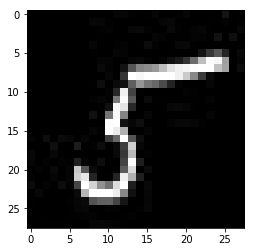

In [191]:
prd_images = []
imgpah="../images/mnist/testSet/5/img_24.jpg"
img = cv2.imread(imgpah, cv2.IMREAD_GRAYSCALE)
prd_images.append(img)
prd_images=array(prd_images)

plt.imshow(img, cmap="gray")

In [192]:
test_data2 = prd_images.reshape(len(prd_images) , IMG_SIZE, IMG_SIZE)
test_data2 = test_data2.astype('float')
test_data2 /= 255

In [193]:
# Predict the most likely class
label_pred = model.predict(test_data2[[0],:])

In [194]:
label_pred

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [195]:
np.argmax(label_pred)

5

### 다른모델 생성 (과적합 회피)

In [199]:
from keras.layers import Dropout

# 입력데이터 형태
modelDim = train_data[0].shape

# 층 누적 기본형태
model = Sequential()

# 신경망의 첫 번째 레이어에서 입력 데이터 크기를 정의해야 합니다.
model.add(Flatten(input_shape=modelDim))
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nClasses, activation='softmax'))

# model.summary()를 통해 모델을 살펴보세요.
model.summary()

W0918 18:20:26.298769 19452 deprecation.py:506] From C:\Users\kopo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 6280      
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                90        
Total params: 6,370
Trainable params: 6,370
Non-trainable params: 0
_________________________________________________________________
